In [1]:
import os
import numpy as np
import pandas as pd
from glob import glob
from datetime import datetime
from tqdm import tqdm
import scipy as sp
import scipy.optimize as op
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from scipy.interpolate import interp1d
import seaborn as sns
%matplotlib inline

import matplotlib.patches as patches


In [2]:
# define ticks
def set_ticks(ax, xMaj, yMaj):
    ax.xaxis.set_major_locator(MultipleLocator(xMaj))
    ax.yaxis.set_major_locator(MultipleLocator(yMaj))
    ax.minorticks_on()
    ax.tick_params(which='major', width=1.0, length=8, direction='in', labelsize=14)
    ax.tick_params(which='minor', width=1.0, length=4, direction='in', labelsize=14)
    ax.yaxis.get_offset_text().set_fontsize(14)
    ax.xaxis.get_offset_text().set_fontsize(14)


In [3]:
sns.set(style = 'white')

mpl.rc('xtick.minor', visible = True)
mpl.rc('ytick.minor', visible = True)
mpl.rc('xtick', direction='in', top=True, bottom = True)
mpl.rc('ytick', direction='in', right=True, left = True)


In [17]:
def ang(theta, A):
    '''
        Angular distribution formula 
    '''
    return(A * np.cos(theta) * np.cos(theta))

def ang_sin(theta, A):
    '''
        Angular distribution formula 
    '''
    return(A * np.cos(theta) * np.cos(theta) * np.sin(theta))

In [31]:
def generate_angular(dist, limits, N):
    
    # extremes in x direction 
    u1 = limits[0] # minimum of x sampling 
    u2 = limits[1] # maximum of x sampling 

    u = np.random.uniform(u1,u2,5*N)

    lower = 0                                       # accept-reject minimum for each point
    upper = np.max(dist(u,A)) # accept-reject maximum for each point 

    v = np.random.uniform(lower, upper, 5*N)

    # accepted points 
    points = u[v < dist(u,A)]
    # compute acceptance ratio 
    efficiency = len(points) / (5*N)

    # keep only N events if we have more 
    if len(points) >= N:
        points = points[:N]
    else:
        print('The wanted number of events is %1.0f'% N )
        print('The number of generated events is %1.0f' % len(points))

    return points, efficiency 


Efficiency: 50 %


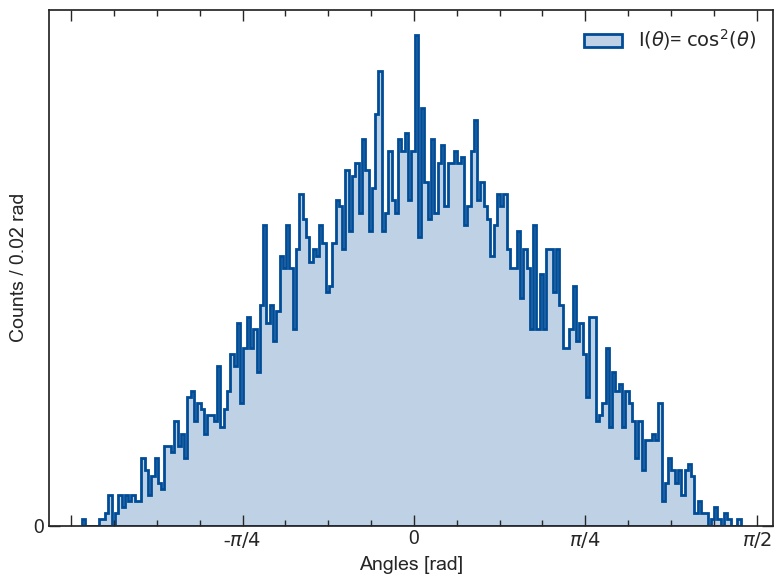

In [46]:
A = 1.
N = 6067


thetas, eff = generate_angular(ang,(-0.5*np.pi,0.5*np.pi), N)

print('\nEfficiency: {:1.0f} %'.format(eff*100))

fig, ax = plt.subplots(figsize=(8,6))
n, bins , _ = ax.hist(thetas, bins=200, histtype='stepfilled',fc='#BFD2E5', ec = '#004C97', lw=2, alpha=1, label="I$(\\theta$)= $\\cos^2(\\theta)$",zorder = 0)

bin_width = bins[1] - bins[0]

# ticks
ax.set_xticks([-np.pi/4, np.pi/2, 0,np.pi/4,np.pi/2],['-$\pi/4$','-$\pi/2$','0','$\pi/4$','$\pi/2$'])

# labels
set_ticks(ax, np.pi/4, 2000)
ax.set_xlabel('Angles [rad]', fontsize=14)
ax.set_ylabel('Counts / %1.2f rad' % bin_width, fontsize=14)

# legend
ax.legend(loc='best', frameon=False, fontsize=14)

fig.tight_layout()
#ig.savefig("plots/cos2.pdf", dpi = 200)

plt.show()

In [47]:
x0 = np.random.uniform(0,182, size = N)

def generate_x(x0, theta, N, h=8.):


    x_ = x0 - (h/np.cos(theta)) * np.sin(theta)

    x_select = np.logical_and(x_ >= 0, x_ <= 182)
    x = x_[x_select]

    n_coincidences = 100 * len(x)/N 

    return x_, x,n_coincidences

In [48]:
x_all, x, n2 = generate_x(x0,thetas, N)
x_all_3, x, n3 = generate_x(x0,thetas, N, 16.)
x_all_4, x, n4 = generate_x(x0,thetas, N, 24.)
x_all_5, x, n5 = generate_x(x0,thetas, N, 32.)

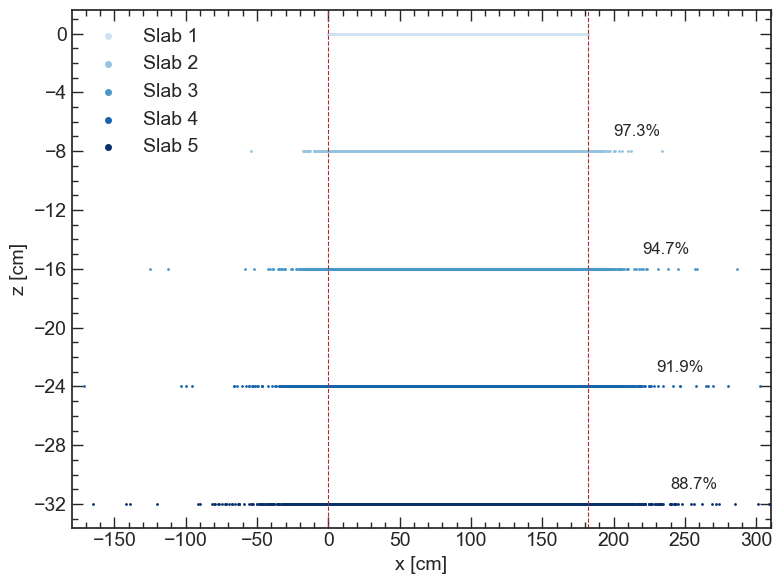

In [51]:
sns.set(style = 'white')
mpl.rc('xtick.minor', visible = True)
mpl.rc('ytick.minor', visible = True)
mpl.rc('xtick', direction='in', top=True, bottom = True)
mpl.rc('ytick', direction='in', right=True, left = True)


z0 = [0] * len(x0)
z1 = [-8.] * len(x_all)

# Data for a three-dimensional line
z0 = [0] * len(x0)
z1 = [-8.] * len(x_all)
z2 = [-16.] * len(x_all_3)
z3 = [-24.] * len(x_all_4)
z4 = [-32.] * len(x_all_5)

fig, ax = plt.subplots(figsize=(8,6))

cmap = mpl.cm.get_cmap('Blues',6)

ax.scatter(x0, z0, color=cmap(1),   marker = '.', s=4, label = 'Slab 1')
ax.scatter(x_all, z1, color=cmap(2),  marker = '.', s=4, label = 'Slab 2')
ax.scatter(x_all_3, z2, color=cmap(3), marker = '.', s=4, label = 'Slab 3')
ax.scatter(x_all_4, z3, color=cmap(4), marker = '.', s=4, label = 'Slab 4')
ax.scatter(x_all_5, z4, color=cmap(5),  marker = '.', s=4, label = 'Slab 5')

ax.text(200,z1[0]+1, '%1.1f'%n2 + '%', fontsize = 12)
ax.text(220,z2[0]+1, '%1.1f'%n3 + '%', fontsize = 12)
ax.text(230,z3[0]+1, '%1.1f'%n4 + '%', fontsize = 12)
ax.text(240,z4[0]+1, '%1.1f'%n5 + '%', fontsize = 12)

ax.axvline(0, ls = '--', c = '#AF272F', lw = 0.8)
ax.axvline(182, ls = '--', c = '#AF272F', lw = 0.8)

# ticks
set_ticks(ax,50,4)
# labels
ax.set_xlabel('x [cm]', fontsize=14)
ax.set_ylabel('z [cm]' , fontsize=14)
ax.set_xlim(-180,310)
# legend
ax.legend(loc='best', frameon=False, fontsize=14, markerscale = 4)

fig.tight_layout()
fig.savefig("plots/1d_sim_slabs.png", dpi = 200)
plt.show()


In [52]:
print('coincidences between 1st and 2nd slab (1D) is %1.1f per cent'%n2)

coincidences between 1st and 2nd slab (1D) is 97.3 per cent


In [59]:
N = 6067
x0 = np.random.uniform(0,182, size = N)
y0 = np.random.uniform(0,20, size = N)
phi = np.random.uniform(0,2*np.pi, size = N)

def generate_xy(theta, x0,y0,phi,N, h=8.):
    
    x_ = x0 - (h/np.cos(theta)) * np.sin(theta)*np.cos(phi)
    y_ = y0 - (h/np.cos(theta)) * np.sin(theta)*np.sin(phi)


    y_select =  np.logical_and(y_ > 0, y_ < 20)
    x_select = np.logical_and(x_ > 0, x_ < 182)
    mask = np.logical_and(x_select,y_select)

    x = x_[mask]
    y = y_[mask]

    n_coincidences = 100 * len(x)/N 

    return x_,y_, x,y, n_coincidences



Efficiency: 55 %


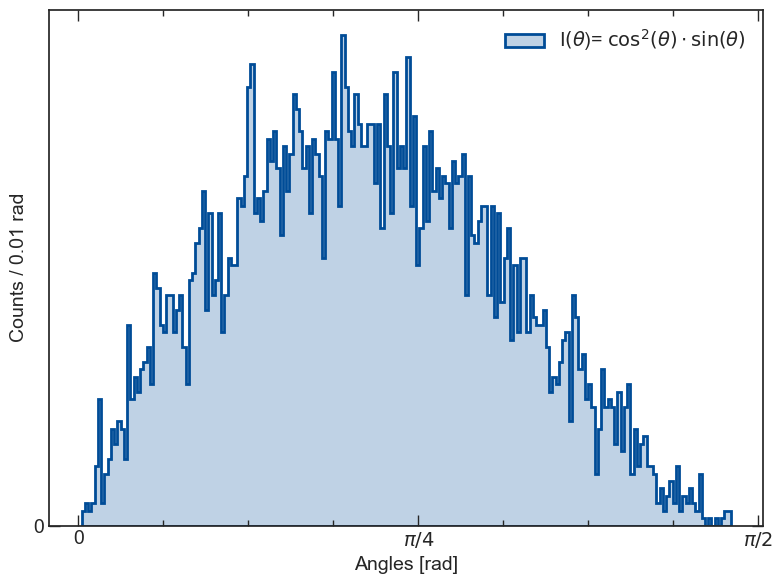

In [64]:
A = 1.

N = 6067

thetas, eff = generate_angular(ang_sin,(0.,0.5*np.pi), N)

print('\nEfficiency: {:1.0f} %'.format(eff*100))

fig, ax = plt.subplots(figsize=(8,6))
n, bins , _ = ax.hist(thetas, bins=200, histtype='stepfilled',fc='#BFD2E5', ec = '#004C97', lw=2, alpha=1, label="I$(\\theta$)= $\\cos^2(\\theta) \cdot \\sin(\\theta)$",zorder = 0)


bin_width = bins[1] - bins[0]

# ticks
ax.set_xticks([0,np.pi/4,np.pi/2],['0','$\pi/4$','$\pi/2$'])

# labels
set_ticks(ax, np.pi/4, 2000)
ax.set_xlabel('Angles [rad]', fontsize=14)
ax.set_ylabel('Counts / %1.2f rad' % bin_width, fontsize=14)


# legend
ax.legend(loc='best', frameon=False, fontsize=14)

fig.tight_layout()
#fig.savefig("plots/cos2sin.pdf", dpi = 200)
plt.show()

In [65]:
x_all,y_all,x_coinc,y_coinc, coinc = generate_xy(thetas,x0,y0,phi, N)

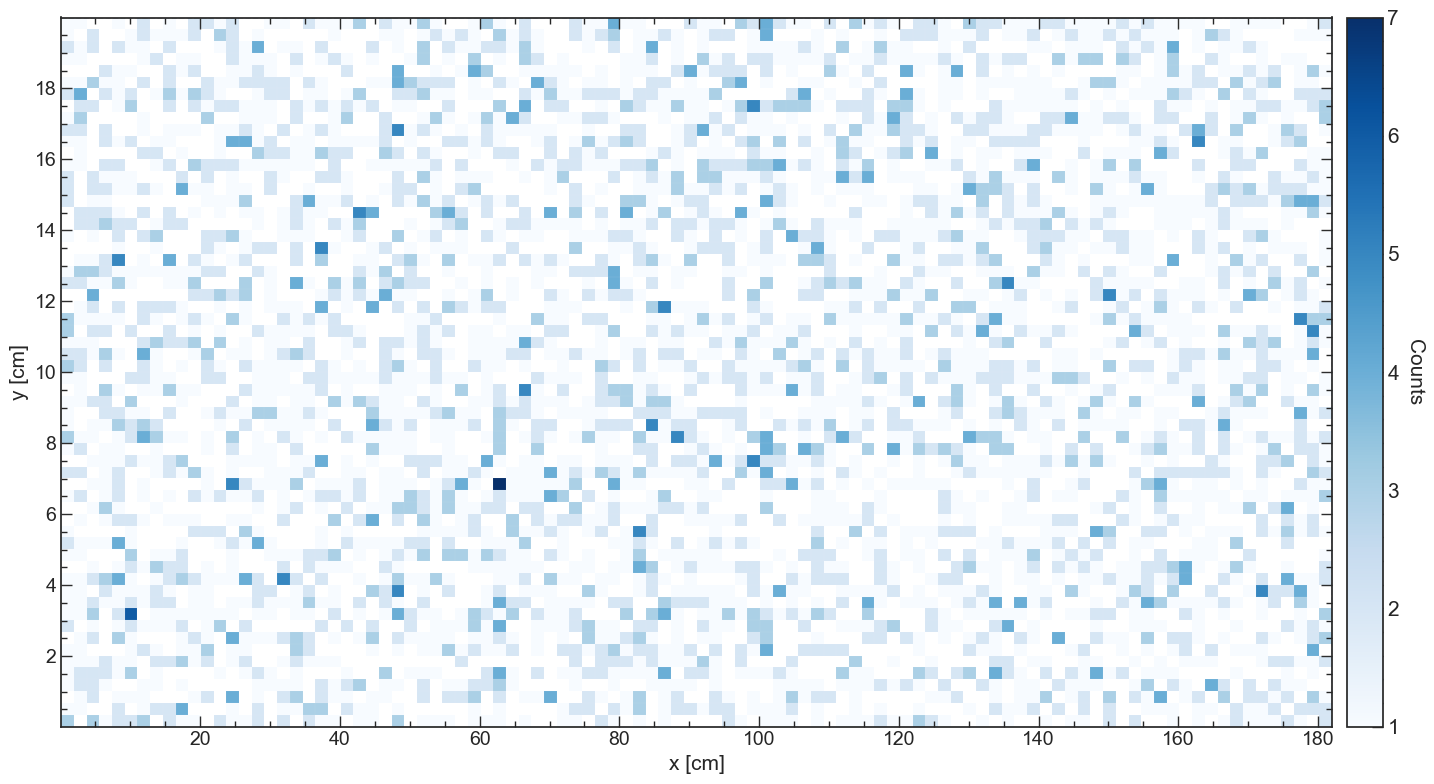

In [66]:
fig, ax = plt.subplots(figsize=(16,8))

binwidth = 0.50      # [cm]
nbinsx = int((np.max(x0) - np.min(x0))/binwidth)
nbinsy = int((np.max(y0) - np.min(y0))/binwidth)

h, binx, biny, im = ax.hist2d(x0,y0, bins=[100,60], cmap='Blues', density = False, cmin = 1, zorder = 0)

for i in range(len(binx)):
    ax.axvline(binx[i], color = 'w', lw = 0.05, alpha = 1)

for i in range(len(biny)):
    ax.axhline(biny[i], color = 'w', lw = 0.05,  alpha = 1)

ax.axhline(biny[-1], color = '#004C97', lw = 1, ls = '--')
ax.axvline(binx[-1], color = '#004C97', lw = 1, ls = '--')

# labels
ax.set_xlabel('x [cm]', fontsize=15)
ax.set_ylabel('y [cm]' , fontsize=15)

# ticks
set_ticks(ax,20,2)

clb = fig.colorbar(im, ax=ax, pad = 0.01)

clb.ax.set_ylabel('Counts', fontsize = 15,rotation=270, labelpad=18)
clb.ax.tick_params(which='major', width=1.0, length=8, direction='in', labelsize=15)


fig.tight_layout()

#fig.savefig("plots/xy_uniform.png", dpi = 400)
plt.show()

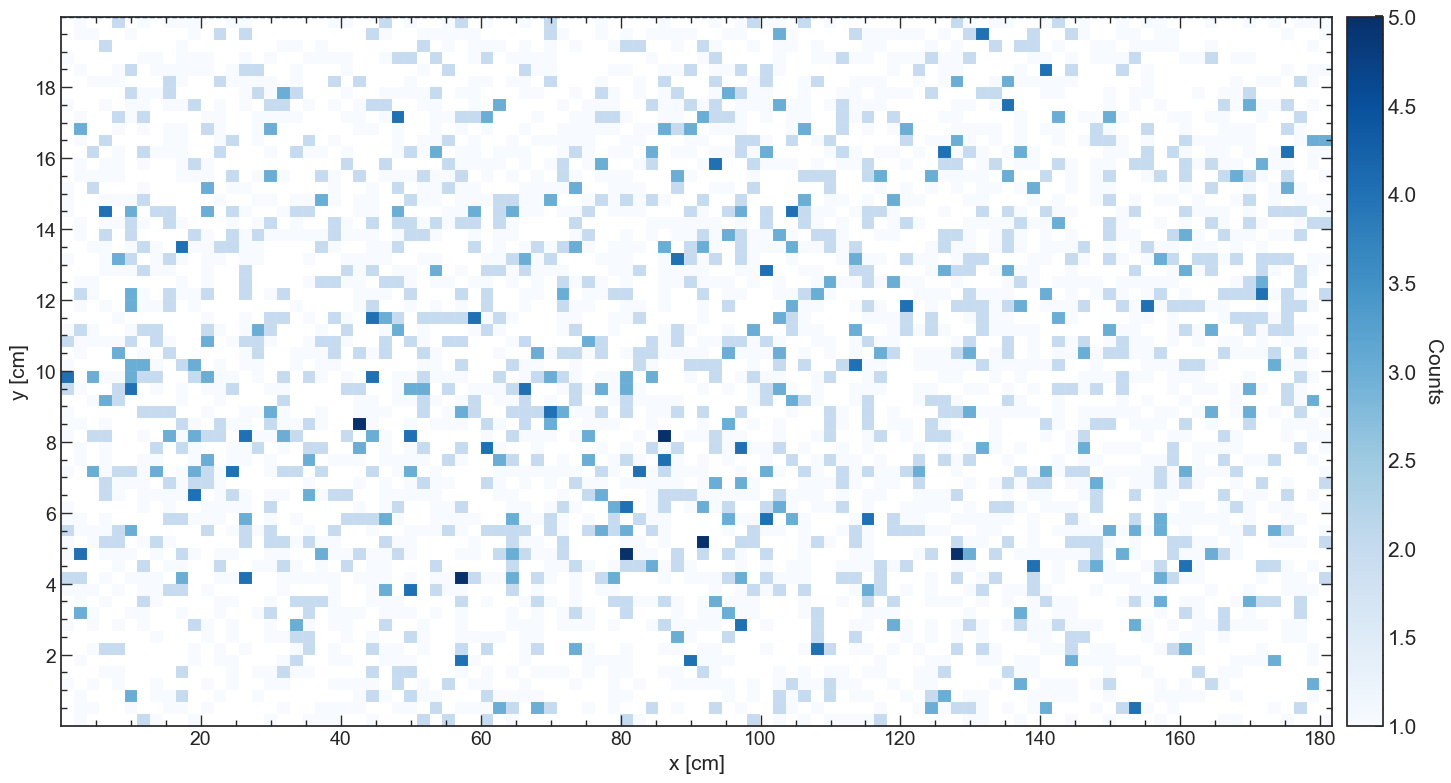

In [67]:
fig, ax = plt.subplots(figsize=(16,8))

binwidth = 0.5      # [cm]
nbinsx = int((np.max(x_coinc) - np.min(x_coinc))/binwidth)
nbinsy = int((np.max(y_coinc) - np.min(y_coinc))/binwidth)

h, binx, biny, im = ax.hist2d(x_coinc,y_coinc, bins=[100,60], cmap='Blues', density = False, cmin = 1,zorder = 0 )

for i in range(len(binx)):
    ax.axvline(binx[i], color = 'w', lw = 0.05)

for i in range(len(biny)):
    ax.axhline(biny[i], color = 'w', lw = 0.05)

ax.axhline(biny[-1], color = '#004C97', lw = 1, ls = '--')
ax.axvline(binx[-1], color = '#004C97', lw = 1, ls = '--')

# ticks
set_ticks(ax,20,2)
# labels
ax.set_xlabel('x [cm]', fontsize=15)
ax.set_ylabel('y [cm]' , fontsize=15)


clb = fig.colorbar(im, ax=ax, pad = 0.01)

clb.ax.tick_params(labelsize=8) 
clb.ax.set_ylabel('Counts', fontsize = 15,rotation=270,labelpad=18)
clb.ax.tick_params(labelsize = 15)

fig.tight_layout()
#fig.savefig("plots/xy_slab2.png", dpi = 400)
plt.show()


In [69]:
x_all_3,y_all_3,x_coinc,y_coinc, coinc= generate_xy(thetas,x0,y0,phi, N, 16.)
x_all_4,y_all_4,x_coinc,y_coinc, coinc= generate_xy(thetas,x0,y0,phi,N, 24.)
x_all_5,y_all_5,x_coinc,y_coinc, coinc= generate_xy(thetas,x0,y0,phi,N, 32.)

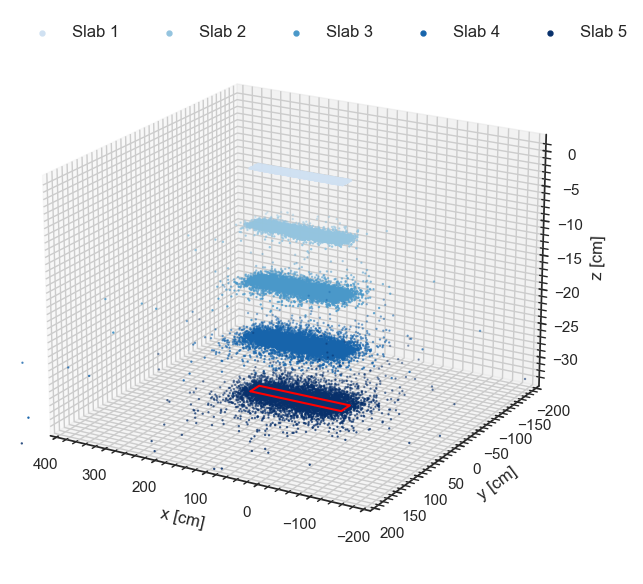

In [93]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111, projection='3d')

cmap = mpl.cm.get_cmap('Blues',6)

# Data for a three-dimensional line
z0 = [0] * len(x0)
z1 = [-8.] * len(x_all)
z2 = [-16.] * len(x_all_3)
z3 = [-24.] * len(x_all_4)
z4 = [-32.] * len(x_all_5)

ax.scatter(x0, y0, z0, color=cmap(1),   marker = '.', s = 2, label = 'Slab 1')
ax.scatter(x_all, y_all, z1, color=cmap(2),  marker = '.', s = 2, label = 'Slab 2')
ax.scatter(x_all_3, y_all_3, z2, color=cmap(3), marker = '.', s = 2, label = 'Slab 3')
ax.scatter(x_all_4, y_all_4, z3, color=cmap(4), marker = '.', s = 2, label = 'Slab 4')
ax.scatter(x_all_5, y_all_5, z4, color=cmap(5),  marker = '.', s = 2, label = 'Slab 5')

ax.set_xlim(-200,400)
ax.set_ylim(-200,200)

ax.set_xlabel("x [cm]")
ax.set_ylabel("y [cm]")
ax.set_zlabel("z [cm]")

ax.legend(loc='upper left', frameon=False, fontsize=12, markerscale=5, ncol=5)

x = [0,182]
y = [20,20]
z = [-32,-32]
ax.plot(x,y,z, c = 'red', zorder = 1000)

x = [0,182]
y = [0,0]
z = [-32,-32]
ax.plot(x,y,z, c = 'red', zorder = 1000)

x = [0,0]
y = [0,20]
z = [-32,-32]
ax.plot(x,y,z, c = 'red', zorder = 1000)

x = [182,182]
y = [0,20]
z = [-32,-32]
ax.plot(x,y,z, c = 'red', zorder = 1000)

ax.view_init(20, 120)
fig.tight_layout()
#fig.savefig("plots/2dslabs.png", dpi = 400)

plt.show()


In [80]:
zt,yt,xt = [],[],[]

for s in [z0,z1,z2,z3,z4]:
    for i in range(len(s)):
        zt.append(s[i])


for s in [x0,x_all,x_all_3,x_all_4,x_all_5]:
    for i in range(len(s)):
        xt.append(s[i])


for s in [y0,y_all,y_all_3,y_all_4,y_all_5]:
    for i in range(len(s)):
        yt.append(s[i])

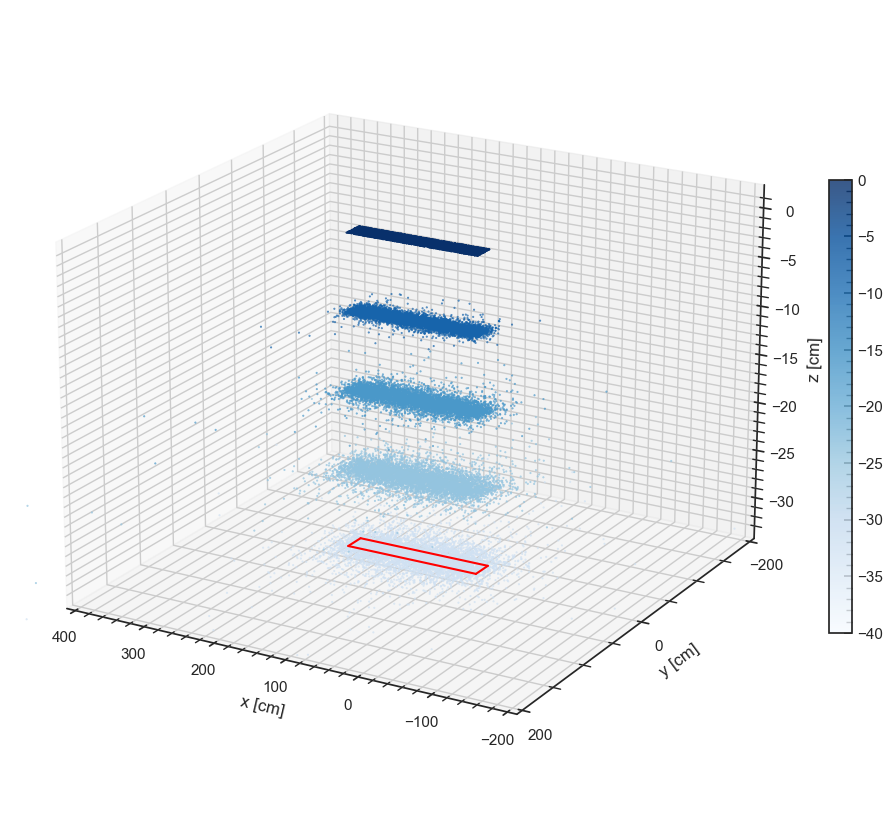

In [97]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

cmap = mpl.cm.get_cmap('Blues')

sctt = ax.scatter3D(xt, yt, zt, alpha = 0.8, c = zt, cmap = cmap, marker = '.', s = 1, vmin = -40)

ax.set_xlabel("x [cm]")
ax.set_ylabel("y [cm]")
ax.set_zlabel("z [cm]")
ax.yaxis.set_major_locator(MultipleLocator(200))

clb = fig.colorbar(sctt, ax = ax,pad = 0.027, shrink=0.47)

ax.set_xlim(-200,400)
ax.set_ylim(-200,200)

ax.set_xlabel("x [cm]")
ax.set_ylabel("y [cm]")
ax.set_zlabel("z [cm]")


x = [0,182]
y = [20,20]
z = [-32,-32]
ax.plot(x,y,z, c = 'red', zorder = 1000)

x = [0,182]
y = [0,0]
z = [-32,-32]
ax.plot(x,y,z, c = 'red', zorder = 1000)

x = [0,0]
y = [0,20]
z = [-32,-32]
ax.plot(x,y,z, c = 'red', zorder = 1000)

x = [182,182]
y = [0,20]
z = [-32,-32]
ax.plot(x,y,z, c = 'red', zorder = 1000)

ax.view_init(20, 120)
fig.tight_layout()
fig.savefig("plots/2dslabs.png", dpi = 400)

plt.show()


In [4]:
from firstslab import *
from lateral_slabs import *

In [5]:
Ntot, rate = coincidences(40)

Coincidences:  6017
Perc. coinc:  13.779599688544863
Numero totale di eventi passato lateralmente:  599
Numero totale di eventi passato lateralmente in coincidenza con la slab:  404


In [8]:
100*404/6016.

6.715425531914893

In [6]:
n = np.zeros((13,4))
means, err = [], []

In [15]:
for index, value in np.ndenumerate(range(5,70,5)):
    means,err = [], []
    for j in tqdm(range(50)):
        Ntot, rate = coincidences(value)
        means.append(rate)
    n[index][0] = value
    n[index][1] = np.mean(means)
    n[index][2] = np.std(means)/np.sqrt(50)
    n[index][3] = Ntot


100%|██████████| 50/50 [03:03<00:00,  3.68s/it]


In [98]:
#np.savetxt('data.txt',n)

n = np.loadtxt('data.txt')

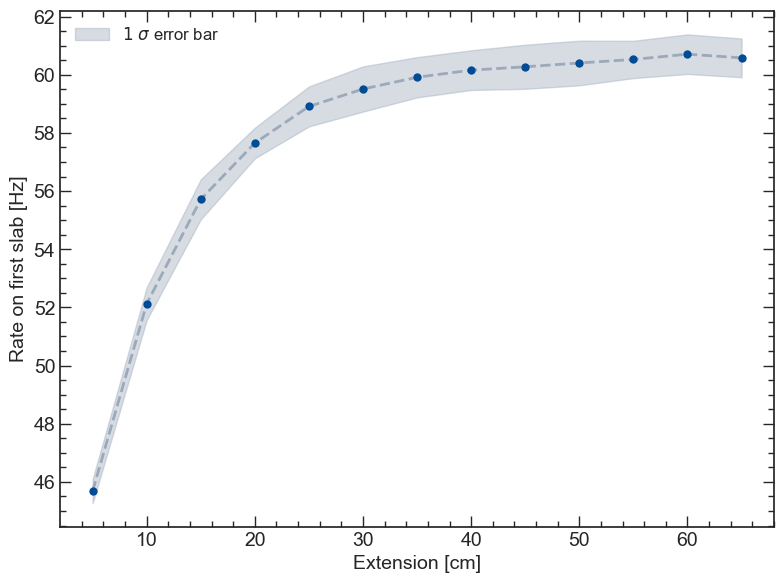

In [122]:
fig, ax = plt.subplots(figsize=(8,6))

ext = range(5,70,5)

erry = n[:,2]*np.sqrt(50)/100
ax.errorbar(ext,n[:,1]/100,yerr = erry,  lw = 0, marker = 'o', mec = 'none', c = '#004C97', elinewidth=0, capsize = 0)
ax.plot(ext, n[:,1]/100, ls = '--', lw = 2, alpha = 1, c = '#9BA9BA')

ax.fill_between(ext, n[:,1]/100 - erry, n[:,1]/100 + erry,
                 color='#9BA9BA', alpha=0.4, label = '$1~\sigma$ error bar')

# ticks
set_ticks(ax,10,2)
# labels
ax.set_xlabel('Extension [cm]', fontsize=14)
ax.set_ylabel('Rate on first slab [Hz]' , fontsize=14)

ax.legend(loc='upper left', frameon=False, fontsize=12)

fig.tight_layout()
fig.savefig("extension.pdf", dpi = 200)
plt.show()

In [11]:
X_tilde = 40

xf, yf, zf, idx, coinc = lateral(X_tilde)

xt, yt, zt = [],[], []

for i in range(0,5):
    for j in range(0,N_events):
        xt.append(xf[i][j])
        yt.append(yf[i][j])
        zt.append(zf[i][j])


518/4516

Coincidences between first and considered slab:  4571
Numero totale di eventi passato lateralmente:  496
Coincidences between first and considered slab:  3365
Numero totale di eventi passato lateralmente:  496
Coincidences between first and considered slab:  2513
Numero totale di eventi passato lateralmente:  496
Coincidences between first and considered slab:  1942
Numero totale di eventi passato lateralmente:  496


0.11470327723649247

In [6]:
X_tilde = 40
Nsim = 100
means = np.zeros((Nsim,4))

for i in tqdm(range(Nsim)):
    _, _, _, _, coinc = lateral(X_tilde)
    means[i] = coinc


100%|██████████| 100/100 [03:22<00:00,  2.02s/it]


In [15]:
#np.savetxt('data_2.txt', means)
df = pd.DataFrame(means)

np.sqrt(100)

10.0

In [22]:
print("%1.2f \pm %1.2f"%( df[0].mean()/100, df[0].std()/1000))
print("%1.2f \pm %1.2f"%( df[1].mean()/100, df[1].std()/1000))
print("%1.2f \pm %1.2f"%( df[2].mean()/100, df[2].std()/1000))
print("%1.2f \pm %1.2f"%( df[3].mean()/100, df[3].std()/1000))

45.28 \pm 0.03
33.29 \pm 0.04
24.97 \pm 0.04
19.41 \pm 0.03


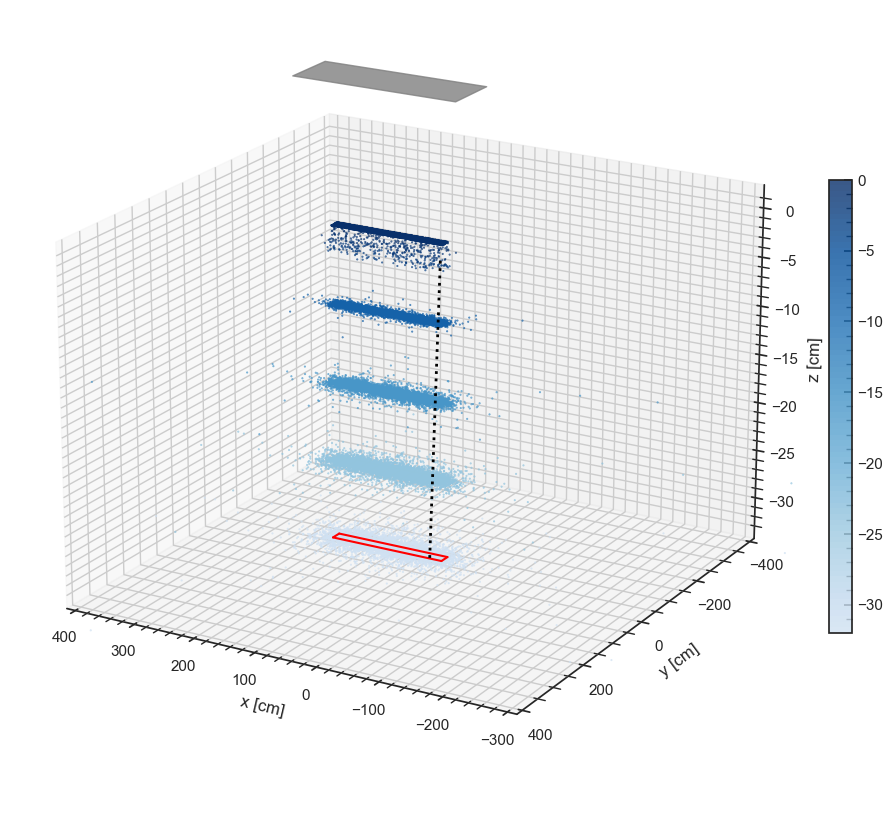

In [249]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

cmap = mpl.cm.Blues(np.linspace(0,1,100))
cmap = mpl.colors.ListedColormap(cmap[20:,:-1])


sctt = ax.scatter3D(xt, yt, zt, alpha = 0.8, c = zt, cmap = cmap, marker = '.', s = 1)

ax.set_xlabel("x [cm]")
ax.set_ylabel("y [cm]")
ax.set_zlabel("z [cm]")
ax.yaxis.set_major_locator(MultipleLocator(200))

fig.colorbar(sctt, ax = ax,pad = 0.027, shrink=0.47)


x = [0,182]
y = [20,20]
z = [-32,-32]
ax.plot(x,y,z, c = 'red', zorder = 1000)
x = [0,182]
y = [0,0]
z = [-32,-32]
ax.plot(x,y,z, c = 'red', zorder = 1000)
x = [0,0]
y = [0,20]
z = [-32,-32]
ax.plot(x,y,z, c = 'red', zorder = 1000)
x = [182,182]
y = [0,20]
z = [-32,-32]
ax.plot(x,y,z, c = 'red', zorder = 1000)

x = [-X_tilde,-X_tilde,182+X_tilde,182+X_tilde]
y = [-X_tilde, 20+X_tilde, 20+X_tilde, -X_tilde]
z = [15,15,15,15]

vertices = [list(zip(x,y,z))]

poly = Poly3DCollection(vertices, alpha=0.8, color = 'gray')

ax.add_collection3d(poly)

ax.set_xlim(-300,400)
ax.set_ylim(-400,400)

index = idx[0]

xline = [xf[0][index], xf[3][index], xf[4][index]]
yline = [yf[0][index], yf[3][index], yf[4][index]]
zline = [zf[0][index], zf[3][index], zf[4][index]]


ax.plot(xline, yline, zline, color = 'black', ls = 'dotted', lw = 2, zorder = 1000)

ax.view_init(20, 120)
fig.tight_layout()
fig.savefig("plots/3dslabs.png", dpi = 400)

plt.show()

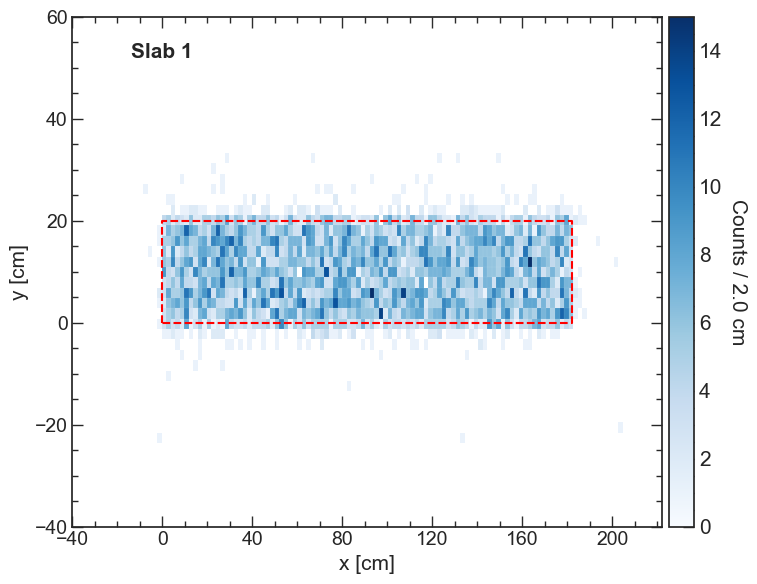

In [254]:
fig, ax = plt.subplots(figsize=(8,6))


binwidth = 2# [cm]
nbinsx = int((np.max(xf[0]) - np.min(xf[0]))/binwidth)
nbinsy = int((np.max(yf[0]) - np.min(yf[0]))/binwidth)

h, binx, biny, im = ax.hist2d(xf[0],yf[0], bins=[nbinsx,nbinsy], cmap='Blues', density = False, vmin = 0, zorder = 0, cmin = 1)

for i in range(len(binx)):
    ax.axvline(binx[i], color = 'w', lw = 0.05, alpha = 1)

for i in range(len(biny)):
    ax.axhline(biny[i], color = 'w', lw = 0.05,  alpha = 1)

# labels
ax.set_xlabel('x [cm]', fontsize=15)
ax.set_ylabel('y [cm]' , fontsize=15)

ax.set_xlim(-X_tilde,182+X_tilde)
ax.set_ylim(-X_tilde,20+X_tilde)


x = [0,0,182,182,0]
y = [0, 20, 20,0,0]

ax.plot(x, y, color="red", zorder = 1000, ls = 'dashed')
ax.text(0.1, 0.92, 'Slab 1', transform=ax.transAxes, fontweight = 'bold', fontsize = 15)
# ticks
set_ticks(ax,40,20)

clb = fig.colorbar(im, ax=ax, pad = 0.01)

clb.ax.set_ylabel('Counts / %1.1f cm'%binwidth,fontsize = 15,rotation=270, labelpad=18)
clb.ax.tick_params(which='major', width=1.0, length=8, direction='in', labelsize=15)


fig.tight_layout()

fig.savefig("plots/3d_slab1.png", dpi = 400)
plt.show()

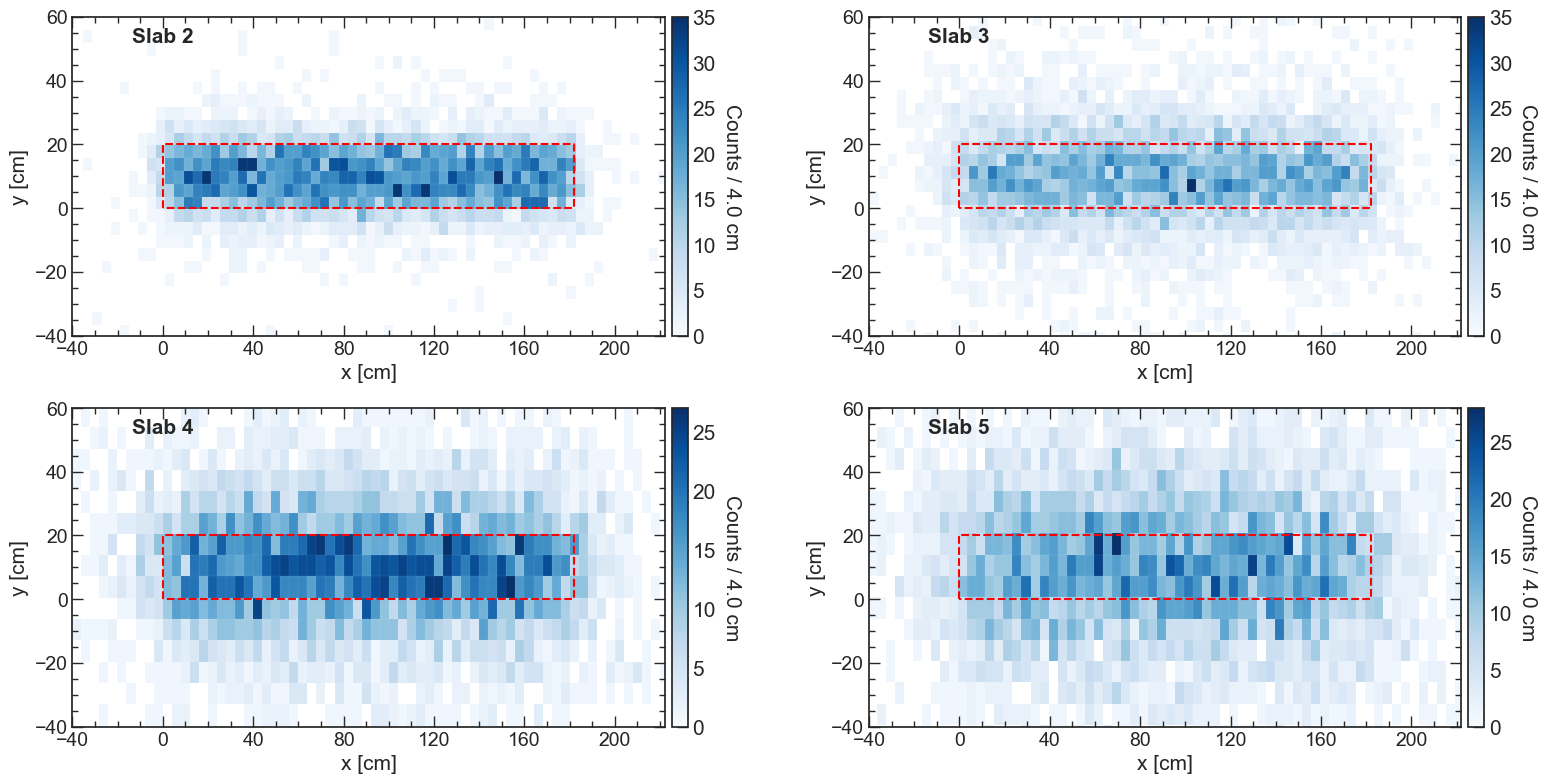

In [238]:
fig, ax = plt.subplots(2,2,figsize=(16,8))

binwidth = 4    # [cm]

for j in range(0,2): 

    nbinsx = int((np.max(xf[j+1]) - np.min(xf[j+1]))/binwidth)
    nbinsy = int((np.max(yf[j+1]) - np.min(yf[j+1]))/binwidth)

    h, binx, biny, im = ax[0,j].hist2d(xf[j+1],yf[j+1], bins=[nbinsx,nbinsy], cmap='Blues', density = False, vmin = 0, zorder = 0, cmin = 1)
    for i in range(len(binx)):
        ax[0,j].axvline(binx[i], color = 'w', lw = 0.05, alpha = 1)
    for i in range(len(biny)):
        ax[0,j].axhline(biny[i], color = 'w', lw = 0.05,  alpha = 1)

    # labels
    ax[0,j].set_xlabel('x [cm]', fontsize=15)
    ax[0,j].set_ylabel('y [cm]' , fontsize=15)

    ax[0,j].set_xlim(-X_tilde,182+X_tilde)
    ax[0,j].set_ylim(-X_tilde,20+X_tilde)


    x = [0,0,182,182,0]
    y = [0, 20, 20,0,0]

    t = 'Slab ' + str(j+2)
    ax[0,j].plot(x, y, color="red", zorder = 1000, ls = 'dashed')
    ax[0,j].text(0.1, 0.92, t, transform=ax[0,j].transAxes, fontweight = 'bold', fontsize = 15)
    # ticks
    set_ticks(ax[0,j],40,20)

    clb = fig.colorbar(im, ax=ax[0,j], pad = 0.01)

    clb.ax.set_ylabel('Counts / %1.1f cm'%binwidth, fontsize = 15,rotation=270, labelpad=18)
    clb.ax.tick_params(which='major', width=1.0, length=8, direction='in', labelsize=15)


for j in range(0,2):   
    nbinsx = int((np.max(xf[j+3]) - np.min(xf[j+3]))/binwidth)
    nbinsy = int(0.6*(np.max(yf[j+3]) - np.min(yf[j+3]))/binwidth)

    h, binx, biny, im = ax[1,j].hist2d(xf[j+3],yf[j+3], bins=[nbinsx,nbinsy], cmap='Blues', density = False, vmin = 0, zorder = 0, cmin = 1)
    for i in range(len(binx)):
        ax[1,j].axvline(binx[i], color = 'w', lw = 0.05, alpha = 1)
    for i in range(len(biny)):
        ax[1,j].axhline(biny[i], color = 'w', lw = 0.05,  alpha = 1)

    # labels
    ax[1,j].set_xlabel('x [cm]', fontsize=15)
    ax[1,j].set_ylabel('y [cm]' , fontsize=15)

    ax[1,j].set_xlim(-X_tilde,182+X_tilde)
    ax[1,j].set_ylim(-X_tilde,20+X_tilde)

    t = 'Slab ' + str(j+4)

    x = [0,0,182,182,0]
    y = [0, 20, 20,0,0]

    ax[1,j].plot(x, y, color="red", zorder = 1000, ls = 'dashed')
    ax[1,j].text(0.1, 0.92, t, transform=ax[1,j].transAxes, fontweight = 'bold', fontsize = 15)
    # ticks
    set_ticks(ax[1,j],40,20)

    clb = fig.colorbar(im, ax=ax[1,j], pad = 0.01)

    clb.ax.set_ylabel('Counts / %1.1f cm'%binwidth, fontsize = 15,rotation=270, labelpad=18)
    clb.ax.tick_params(which='major', width=1.0, length=8, direction='in', labelsize=15)


fig.tight_layout()
fig.subplots_adjust(wspace = 0.13)
fig.savefig("plots/3d_projection.png", dpi = 400)
plt.show()

In [262]:
df = pd.DataFrame(n)
df

,0,1,2,3
0,5.0,4568.38,5.853948,9600.0
1,10.0,5212.64,7.941474,13466.0
2,15.0,5571.62,9.712173,17666.0
3,20.0,5765.30,7.452154,22200.0
4,25.0,5891.02,9.721172,27066.0
5,30.0,5950.98,10.983132,32266.0
6,35.0,5991.32,9.804303,37800.0
7,40.0,6015.86,9.645518,43666.0
8,45.0,6027.44,10.734027,49866.0
9,50.0,6040.44,10.856930,56400.0


In [24]:
print(100*df[0].mean()/6016)
print(100*df[1].mean()/6016)
print(100*df[2].mean()/6016)
print(100*df[3].mean()/6016)

75.27044547872342
55.333444148936174
41.498337765957444
32.25864361702128
